### Assignment-04

#### Part 1-2 Finish the Solution Parse for Edit Distance

In [5]:
from functools import lru_cache 

In [6]:
solution = {}

In [9]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]

    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]

    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 2, 'SUB {} => {}'.format(tail_s1, tail_s2))

        candidates.append(both_forward)
        
        # find the minimal edit distance among all possible operations
        min_distance, operation = min(candidates, key=lambda x: x[0])
        
        solution[(string1, string2)] = operation
        
        return min_distance
    

In [10]:
len('')

0

In [ ]:
def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)
        

In [8]:
edit_distance('ABCD','ABCE')

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

#### Part 3 Review Questions
+ Why do we need dynamic programming? What's the difference between dynamic programming and the previous search problem?

**Ans:** 

Dynamic Programming （DP） 是一类重要的搜索和优化问题，与前面所涉及的搜索问题（深度优先、广度优先）不同的是，DP 问题具有递归性，这种递归性又使得我们可以使用分析的方法来减小搜索空间、提高算法运行速度。
在 NLP 的语境下，DP 问题与 edit distance 和 word-embedding 问题相关。

+ Why do we still need dynamic programming? Why not train a machine learning to fit a function which could get the right answer based on inputs?


**Ans:** 

机器学习思路的局限有三个：a) 需要充足的训练数据量; b) 训练函数参量所花费的时间成本较高; c) 机器学习只能得到概率上的近似解而非精确解。相比之下，基于分析的 DP 思路得到的解决方案比训练函数和神经网络的速度快，而且可以得到精确解。

+ Provide at least 3 problems which could solved by Dynamic Programming.

**Ans:** 

课上讲到的例子有：瓷砖切割问题、外卖路线优化问题; 其他应用有生物信息学中的序列分析 (sequence alignment)。


+ Provide at least 3 problems wich could sloved by Edit Distance?

**Ans:** 

测量两个字符串或语言文本之间的相似度；拼写纠错的优化；用来衡量和评价机器翻译的精确度。

+ Please summarize the three main features of Dynamic Programming, and make a concise explanation for each feature.

**Ans:** 

* 分析子问题的重复性 (recursive -- 递归)；
* 把子问题存储起来 (比如用python里的decorator实现)
* 构建和解析solution

+ What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

**Ans:** 

DP 算法的局限性主要有：a) 所要解决的子问题之间必须具有重复性 (overlapping) 且解决方式呈递归性（recursive）; b) 全局最优解必须是子问题局部最优解的相关函数（否则可能会出现所有子问题的局部最优解的集合并非全局最优）。

Reference: https://en.wikipedia.org/wiki/Dynamic_programming

#### (Optional) The k-person-salesman problem

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitude = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

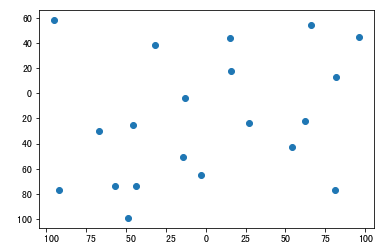

In [3]:
plt.scatter(latitude, longitude)

给定一个初始点 $P$, 已知$k$个车辆，如何从该点出发，使这$k$个车辆经过所有的点全部一次，而且所走过的路程最短?